## Preparing Data and Initial Parameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from perceptron import LinealPerceptron, HiperbolicPerceptron, LogisticPerceptron

def get_data():
    data = pd.read_csv('TP3-ej2-conjunto.csv')  # Change this to your CSV file
    input_data = np.array(data[['x1', 'x2', 'x3']])  # Input features
    expected_data = np.array(data['y'])  # Expected outputs
    return input_data, expected_data


input_data, expected_data = get_data()
# Define a split ratio for training and testing data
train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(input_data) * train_ratio)

training_data = input_data[:split_index].tolist()  # Training data
testing_data = input_data[split_index:].tolist()  # Testing data

# Hyperparameters
input_size = 3
bias = 1
error_threshold = 0.0001
max_epochs = 150000
beta = 1  # Default value for beta

## Learning rate 

In [2]:

num_iterations = 10
learning_rates = [0.0001, 0.001, 0.01]

# Utility function to pad arrays to the same length
def extend_to_max_length(values, max_length):
    return np.pad(values, (0, max_length - len(values)), 'edge')

# Function to run experiments and save results
def run_experiments_and_save_to_csv(filename):
    results = []
    
    # Run for Linear Perceptron
    for lr in learning_rates:
        all_mse = []  # List to store MSE for all iterations
        max_length = 0  # To track the longest MSE sequence
        for _ in range(num_iterations):
            linear_perceptron = LinealPerceptron(lr, [], bias, input_size, error_threshold)
            epochs, train_errors, test_errors = linear_perceptron.train(
                training_data, testing_data, expected_data[:split_index], expected_data[split_index:], max_epochs
            )
            mse = (np.array(train_errors) + np.array(test_errors)) / 2
            all_mse.append(mse)
            max_length = max(max_length, len(mse))  # Track the maximum length
        
        all_mse = [extend_to_max_length(m, max_length) for m in all_mse]
        avg_mse = np.mean(np.array(all_mse), axis=0)  # Calculate the average MSE
        
        # Save the results for each epoch
        for epoch, mse in enumerate(avg_mse):
            results.append({'Perceptron Type': 'Linear', 'Learning Rate': lr, 'Epoch': epoch, 'MSE': mse})
    
    # Run for Hyperbolic Perceptron
    for lr in learning_rates:
        all_mse = []
        max_length = 0
        for _ in range(num_iterations):
            hiperbolic_perceptron = HiperbolicPerceptron(beta, lr, [], bias, input_size, error_threshold)
            epochs, train_errors, test_errors = hiperbolic_perceptron.train(
                training_data, testing_data, expected_data[:split_index], expected_data[split_index:], max_epochs
            )
            mse = (np.array(train_errors) + np.array(test_errors)) / 2
            all_mse.append(mse)
            max_length = max(max_length, len(mse))
        
        all_mse = [extend_to_max_length(m, max_length) for m in all_mse]
        avg_mse = np.mean(np.array(all_mse), axis=0)  # Calculate the average MSE
        
        # Save the results for each epoch
        for epoch, mse in enumerate(avg_mse):
            results.append({'Perceptron Type': 'Hyperbolic', 'Learning Rate': lr, 'Epoch': epoch, 'MSE': mse})
    
    # Run for Logistic Perceptron
    for lr in learning_rates:
        all_mse = []
        max_length = 0
        for _ in range(num_iterations):
            logistic_perceptron = LogisticPerceptron(beta, lr, [], bias, input_size, error_threshold)
            epochs, train_errors, test_errors = logistic_perceptron.train(
                training_data, testing_data, expected_data[:split_index], expected_data[split_index:], max_epochs
            )
            mse = (np.array(train_errors) + np.array(test_errors)) / 2
            all_mse.append(mse)
            max_length = max(max_length, len(mse))
        
        all_mse = [extend_to_max_length(m, max_length) for m in all_mse]
        avg_mse = np.mean(np.array(all_mse), axis=0)  # Calculate the average MSE
        
        # Save the results for each epoch
        for epoch, mse in enumerate(avg_mse):
            results.append({'Perceptron Type': 'Logistic', 'Learning Rate': lr, 'Epoch': epoch, 'MSE': mse})
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(filename, index=False)  # Save to CSV

# Save the data to a CSV
csv_filename = 'MSE_By_LR-Epochs.csv'
run_experiments_and_save_to_csv(csv_filename)


In [3]:
# Read the CSV and plot the data
results_df = pd.read_csv(csv_filename)

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Plot for the Linear Perceptron
plt.subplot(1, 3, 1)
linear_data = results_df[results_df['Perceptron Type'] == 'Linear']
for lr in learning_rates:
    data_for_lr = linear_data[linear_data['Learning Rate'] == lr]
    avg_mse = data_for_lr.groupby('Epoch')['MSE'].mean()  # Calculate the average MSE
    plt.plot(avg_mse.index, avg_mse.values, label=f'LR = {lr}')  # Plot the average MSE
plt.xlabel("Number of epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Linear Perceptron")
plt.legend()
plt.grid(True)

# Plot for the Hyperbolic Perceptron
plt.subplot(1, 3, 2)
hyperbolic_data = results_df[results_df['Perceptron Type'] == 'Hyperbolic']
for lr in learning_rates:
    data_for_lr = hyperbolic_data[hyperbolic_data['Learning Rate'] == lr]
    avg_mse = data_for_lr.groupby('Epoch')['MSE'].mean()  # Calculate the average MSE
    plt.plot(avg_mse.index, avg_mse.values, label=f'LR = {lr}')  # Plot the average MSE
plt.xlabel("Number of epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Hyperbolic Perceptron")
plt.legend()
plt.grid(True)

# Plot for the Logistic Perceptron
plt.subplot(1, 3, 3)
logistic_data = results_df[results_df['Perceptron Type'] == 'Logistic']
for lr in learning_rates:
    data_for_lr = logistic_data[logistic_data['Learning Rate'] == lr]
    avg_mse = data_for_lr.groupby('Epoch')['MSE'].mean()  # Calculate the average MSE
    plt.plot(avg_mse.index, avg_mse.values, label=f'LR = {lr}')  # Plot the average MSE
plt.xlabel("Number of epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Logistic Perceptron")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()  # Display the plots

We can see that the Hyperbolic and Logistic Perceptron are way better than the Linear percepetron on this dataSet. The better one is the Hyperbolic Perceptron. A litlle learning rate will make the training slower. Maybe it will allow to have better performance of the perceptron but we want to keep a good ratio of compute/Performance so we will 

In [9]:
# Hyperparameters
input_size = 3
bias = 1
error_threshold = 0.0001
max_epochs = 5000
beta = 1

learning_rate = 0.01  # Fixed learning rate
training_ratios = [0.6, 0.7, 0.8, 0.9]  # Different training ratios
num_iterations = 10  # Number of iterations to average over

def run_experiments_with_ratios(filename):
    results = []
    
    # Loop through each training ratio
    for train_ratio in training_ratios:
        split_index = int(len(input_data) * train_ratio)
        training_data = input_data[:split_index].tolist()  # Training data
        testing_data = input_data[split_index:].tolist()  # Testing data
        
        # Linear Perceptron
        all_mse = []
        max_length = 0
        for _ in range(num_iterations):
            linear_perceptron = LinealPerceptron(learning_rate, [], bias, input_size, error_threshold)
            epochs, train_errors, test_errors = linear_perceptron.train(
                training_data, testing_data, expected_data[:split_index], expected_data[split_index:], max_epochs
            )
            mse = (np.array(train_errors) + np.array(test_errors)) / 2
            all_mse.append(mse)
            max_length = max(max_length, len(mse))
        
        all_mse = [extend_to_max_length(m, max_length) for m in all_mse]
        avg_mse = np.mean(np.array(all_mse), axis=0)
        
        for epoch, mse in enumerate(avg_mse):
            results.append({
                'Perceptron Type': 'Linear',
                'Training Ratio': train_ratio,
                'Epoch': epoch,
                'MSE': mse
            })
        
        # Hyperbolic Perceptron
        all_mse = []
        max_length = 0
        for _ in range(num_iterations):
            hiperbolic_perceptron = HiperbolicPerceptron(beta, learning_rate, [], bias, input_size, error_threshold)
            epochs, train_errors, test_errors = hiperbolic_perceptron.train(
                training_data, testing_data, expected_data[:split_index], expected_data[split_index:], max_epochs
            )
            mse = (np.array(train_errors) + np.array(test_errors)) / 2
            all_mse.append(mse)
            max_length = max(max_length, len(mse))
        
        all_mse = [extend_to_max_length(m, max_length) for m in all_mse]
        avg_mse = np.mean(np.array(all_mse), axis=0)
        
        for epoch, mse in enumerate(avg_mse):
            results.append({
                'Perceptron Type': 'Hyperbolic',
                'Training Ratio': train_ratio,
                'Epoch': epoch,
                'MSE': mse
            })
        
        # Logistic Perceptron
        all_mse = []
        max_length = 0
        for _ in range(num_iterations):
            logistic_perceptron = LogisticPerceptron(beta, learning_rate, [], bias, input_size, error_threshold)
            epochs, train_errors, test_errors = logistic_perceptron.train(
                training_data, testing_data, expected_data[:split_index], expected_data[split_index:], max_epochs
            )
            mse = (np.array(train_errors) + np.array(test_errors)) / 2
            all_mse.append(mse)
            max_length est max(max_length, len(mse))
        
        all_mse = [extend_to_max_length(m, max_length) pour m dans all_mse]
        avg_mse = np.mean(np.array(all_mse), axis=0)
        
        for epoch, mse en enumerate(avg_mse):
            results.append({
                'Perceptron Type': 'Logistic',
                'Training Ratio': train_ratio,
                'Epoch': epoch,
                'MSE': mse
            })
    
    # Save results to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(filename, index=False)  # Save to CSV

# Save data to CSV with fixed learning rate
csv_filename = 'perceptron_MSE_byTrainRatio-Epochs.csv'
run_experiments_with_ratios(csv_filename)

SyntaxError: invalid syntax (160269649.py, line 77)

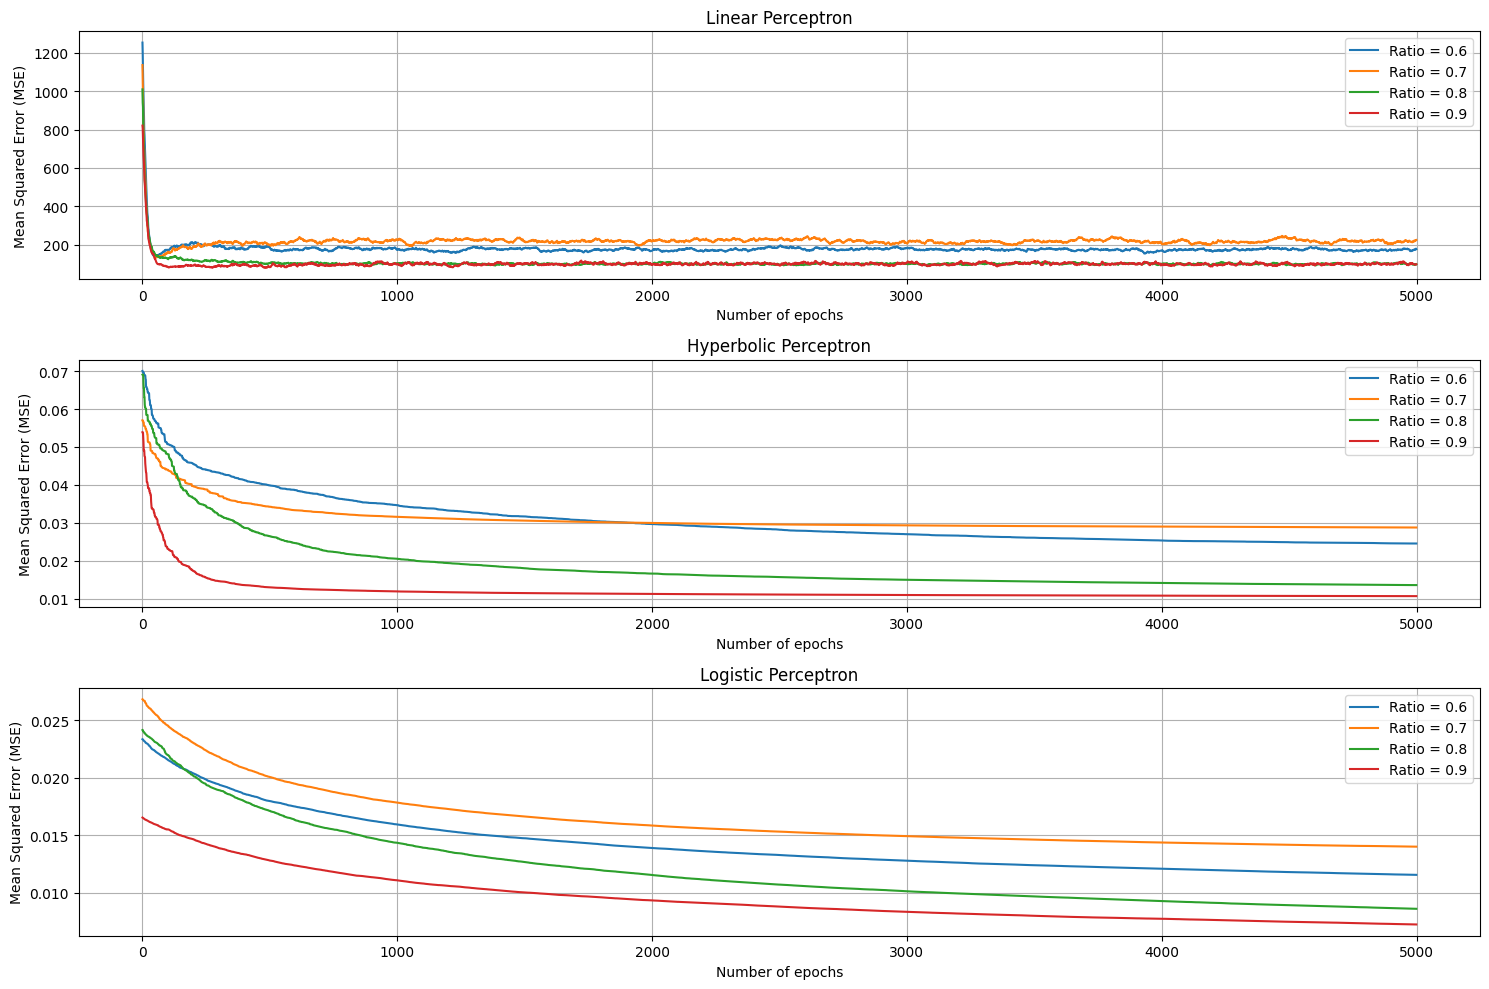

In [13]:
# Read CSV and create plots
csv_filename = 'MSE_byTrainRatio-Epochs.csv'
results_df = pd.read_csv(csv_filename)
training_ratios = [0.6, 0.7, 0.8, 0.9]  # Different training ratios

plt.figure(figsize=(15, 10))

# Create plots for each perceptron type and training ratio
for perceptron_type in ['Linear', 'Hyperbolic', 'Logistic']:
    plt.subplot(3, 1, ['Linear', 'Hyperbolic', 'Logistic'].index(perceptron_type) + 1)
    data_for_type = results_df[results_df['Perceptron Type'] == perceptron_type]
    
    for train_ratio in training_ratios:
        data_for_ratio = data_for_type[data_for_type['Training Ratio'] == train_ratio]
        avg_mse = data_for_ratio.groupby('Epoch')['MSE'].mean()
        
        plt.plot(avg_mse.index, avg_mse.values, label=f'Ratio = {train_ratio}')
    
    plt.xlabel("Number of epochs")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"{perceptron_type} Perceptron")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()  # Display the plots